In [1]:
import numpy as np
from sklearn.svm import SVC # "Support vector classifier"

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

# load data
iris = datasets.load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [4]:
# Split data, 40% for testing and 60 for training
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# use linear kernal and C=1
# and train your model using training dataset
clf = svm.SVC(C=1,kernel='linear').fit(X_train, y_train)

# calculate score using testing dataset
clf.score(X_test,y_test)

(90, 4) (90,)
(60, 4) (60,)


0.9666666666666667

In [7]:
from sklearn.model_selection import cross_val_score

# use linear kernal and C=1
clf = svm.SVC(C=1,kernel='linear')

# 5-fold cross validation
scores = cross_val_score(clf,X_train,y_train,cv=5)
print(scores)

[1.         1.         1.         1.         0.94444444]


In [8]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.04)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

# centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()

In [14]:
def vis(X, y):
    '''this function visalize data in a 3D space'''
    fig = plt.figure(1, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    # clear current plot
    plt.cla()

    for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
        ax.text3D(X[y == label, 0].mean(),
                  X[y == label, 1].mean() + 1.5,
                  X[y == label, 2].mean(), name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(np.float64)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
               edgecolor='k')

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])

    plt.show()

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150, 4)


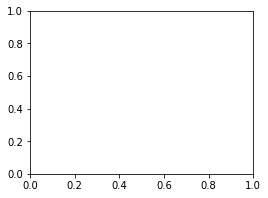

In [15]:
X = iris.data
y = iris.target


print(X[:5])
print(X.shape)
vis(X,y)

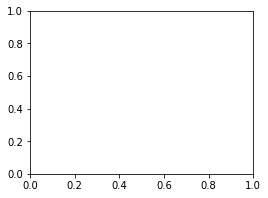

In [30]:
X = iris.data
y = iris.target

# TODO
# PCA, three dimensionality
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit_transform(X)


vis(X,y)

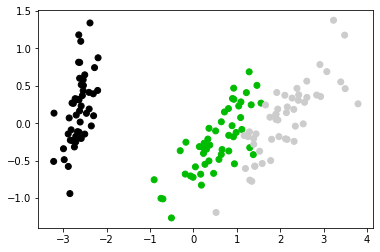

In [40]:
X = iris.data
y = iris.target

# TODO PCA shrink to 2 dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc=pca.fit_transform(X)
# TODO
# PC1 as x-axis, PC2 as y-axis, color is y
plt.scatter(pc[:,0],pc[:,1] , c=y, cmap=plt.cm.nipy_spectral)